In [133]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

In [134]:
df =pd.read_csv('2 loan_approval_data.csv')

In [135]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [136]:
df.shape

(1000, 20)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [138]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [139]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [140]:
cat_col =df.select_dtypes(include=["object"]).columns 
num_col =df.select_dtypes(include=["number"]).columns 

In [141]:
cat_col

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [142]:
num_col

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [143]:
from sklearn.impute import SimpleImputer

num_imp =SimpleImputer(strategy="mean")
df[num_col] =num_imp.fit_transform(df[num_col])

In [144]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [145]:
cat_imp =SimpleImputer(strategy="most_frequent")
df[cat_col] =cat_imp.fit_transform(df[cat_col])

In [146]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [147]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

Text(0.5, 1.0, 'Is Loan Approved')

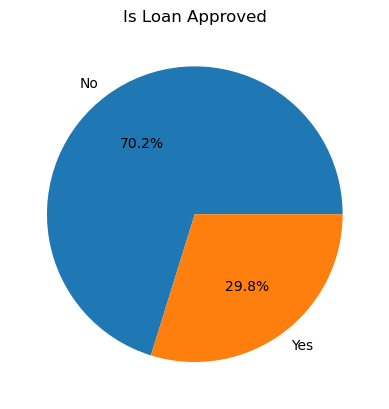

In [148]:
classes_count =df['Loan_Approved'].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Is Loan Approved")

[Text(0, 0, '621'), Text(0, 0, '379')]

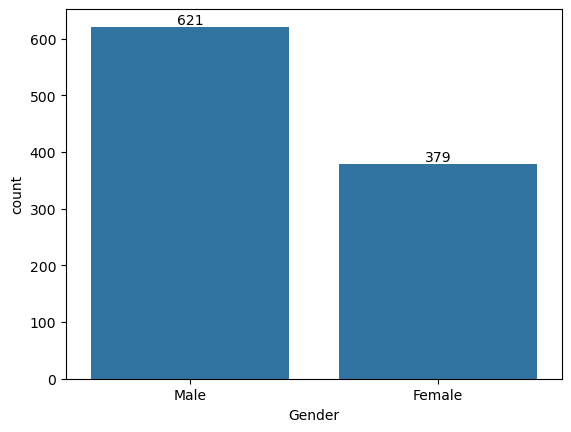

In [149]:
gender_count =df['Gender'].value_counts() 
ax =sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

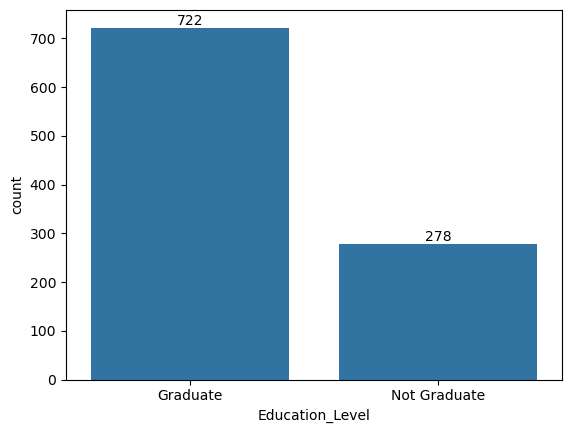

In [150]:
Education_count =df['Education_Level'].value_counts() 
ax =sns.barplot(Education_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '515'), Text(0, 0, '213'), Text(0, 0, '182'), Text(0, 0, '90')]

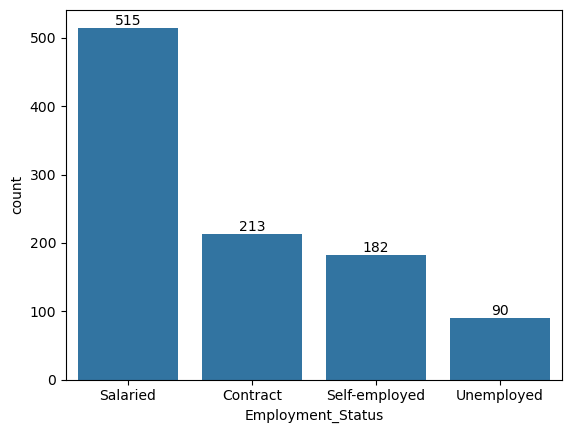

In [151]:
Employment_count =df['Employment_Status'].value_counts() 
ax =sns.barplot(Employment_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '643'), Text(0, 0, '357')]

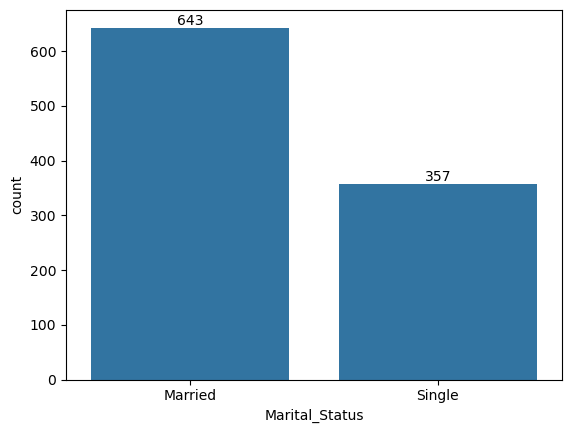

In [152]:
Marital_Status_count =df['Marital_Status'].value_counts() 
ax =sns.barplot(Marital_Status_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '252'),
 Text(0, 0, '199'),
 Text(0, 0, '190'),
 Text(0, 0, '181'),
 Text(0, 0, '178')]

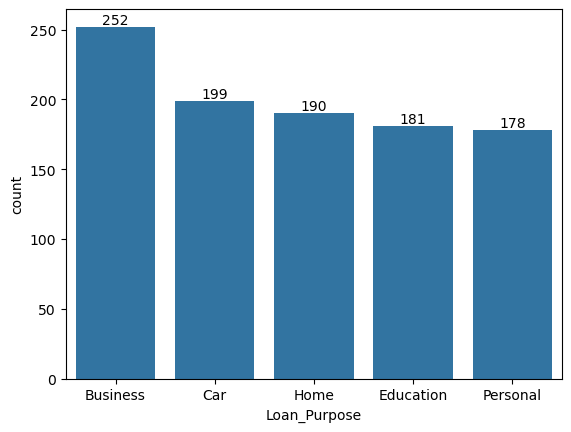

In [153]:
Loan_Purpose_count =df['Loan_Purpose'].value_counts() 
ax =sns.barplot(Loan_Purpose_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '422'),
 Text(0, 0, '202'),
 Text(0, 0, '144'),
 Text(0, 0, '135'),
 Text(0, 0, '97')]

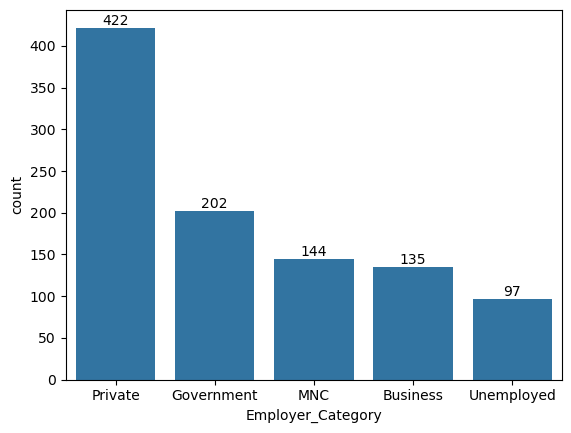

In [154]:
Employer_Category_count =df['Employer_Category'].value_counts() 
ax =sns.barplot(Employer_Category_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '517'), Text(0, 0, '294'), Text(0, 0, '189')]

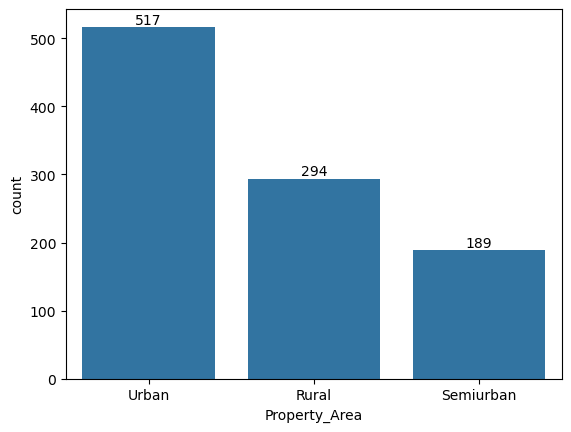

In [155]:
Property_Area_count =df['Property_Area'].value_counts() 
ax =sns.barplot(Property_Area_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

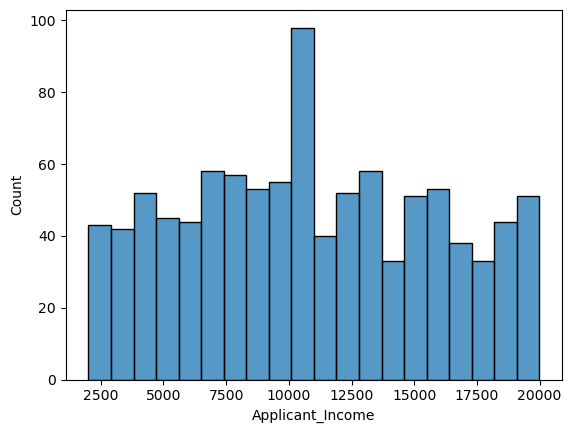

In [156]:
sns.histplot(
    data =df,
    x ="Applicant_Income",
    bins =20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

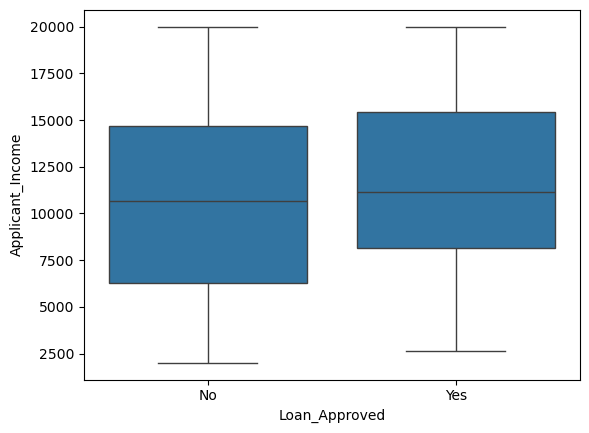

In [157]:
sns.boxplot(
    data =df, 
    x ="Loan_Approved", 
    y ="Applicant_Income"
)

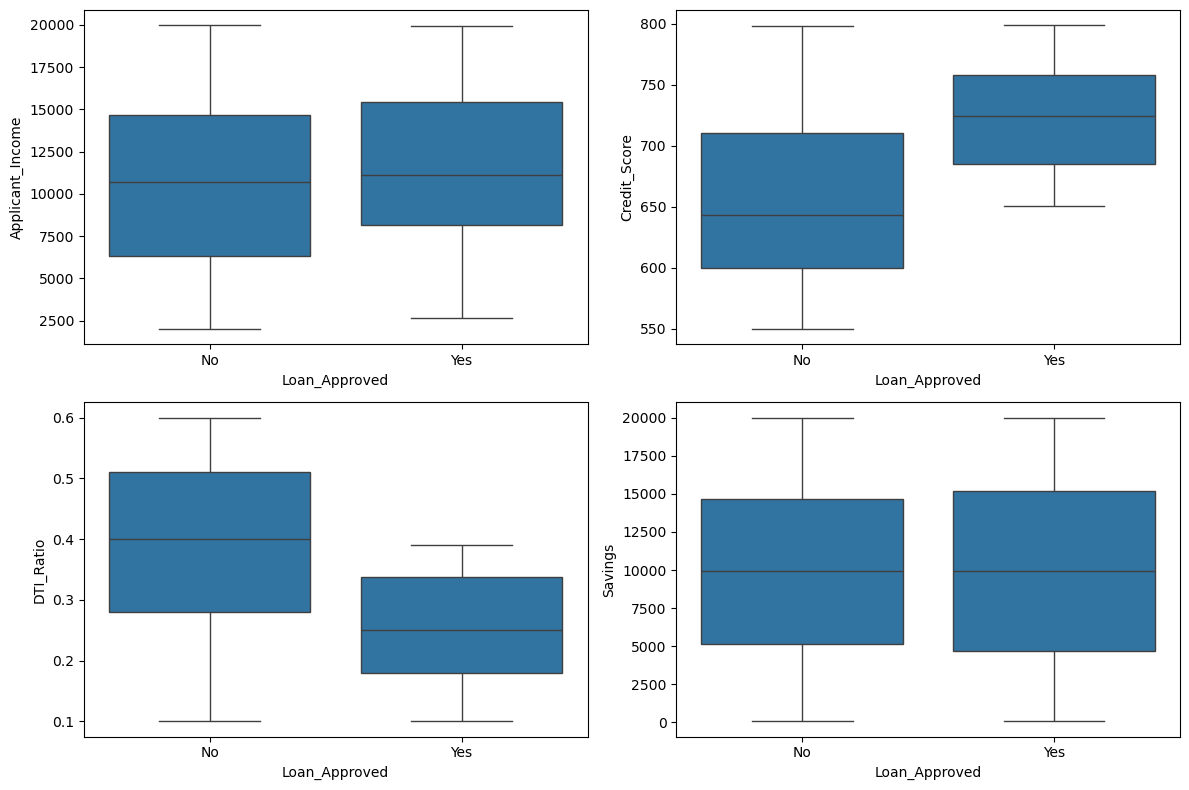

In [158]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=df, x="Loan_Approved", y="Applicant_Income")
sns.boxplot(ax=axes[0, 1], data=df, x="Loan_Approved", y="Credit_Score")
sns.boxplot(ax=axes[1, 0], data=df, x="Loan_Approved", y="DTI_Ratio")
sns.boxplot(ax=axes[1, 1], data=df, x="Loan_Approved", y="Savings")

plt.tight_layout()
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Count'>

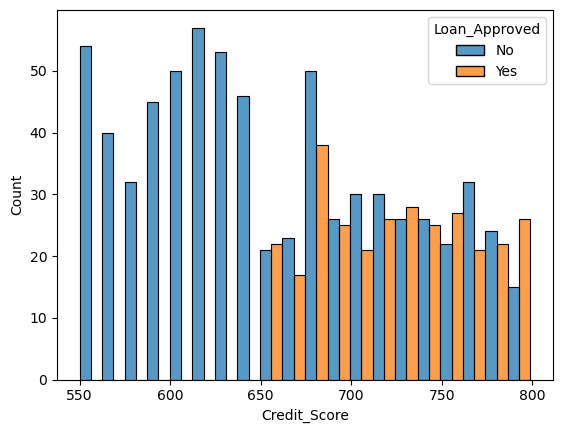

In [159]:
sns.histplot(
    data =df,
    x ="Credit_Score",
    hue ="Loan_Approved",
    bins =20,
    multiple ="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

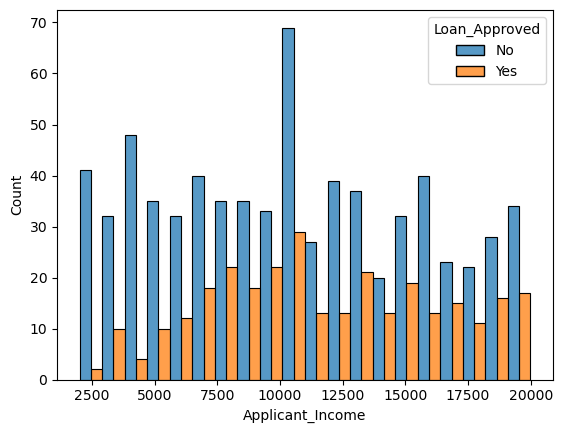

In [160]:
sns.histplot(
    data =df,
    x ="Applicant_Income",
    hue ="Loan_Approved",
    bins =20,
    multiple ="dodge"
)

In [161]:
df =df.drop("Applicant_ID",axis=1)

In [162]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [163]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [164]:
df.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [165]:
le =LabelEncoder() 
df['Education_Level'] =le.fit_transform(df["Education_Level"])
df['Loan_Approved'] =le.fit_transform(df['Loan_Approved'])


In [166]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [167]:
cols =['Employment_Status','Marital_Status','Loan_Purpose','Property_Area','Gender','Employer_Category']
ohe =OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoded =ohe.fit_transform(df[cols])

encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(cols),index =df.index)


In [168]:
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [208]:
df =pd.concat([df.drop(columns=cols),encoded_df],axis=1)

In [210]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [214]:
nums_cols =df.select_dtypes(include="number")
corr_matrix =nums_cols.corr()

In [216]:
nums_cols.corr()["Loan_Approved"]

Applicant_Income                   0.119796
Coapplicant_Income                 0.004230
Age                               -0.022343
Dependents                        -0.023811
Credit_Score                       0.451175
Existing_Loans                    -0.034794
DTI_Ratio                         -0.444783
Savings                           -0.013437
Collateral_Value                   0.021868
Loan_Amount                       -0.126499
Loan_Term                         -0.086644
Education_Level                   -0.052920
Loan_Approved                      1.000000
Employment_Status_Salaried        -0.041428
Employment_Status_Self-employed   -0.001337
Employment_Status_Unemployed      -0.044464
Marital_Status_Single              0.030182
Loan_Purpose_Car                  -0.056416
Loan_Purpose_Education            -0.016684
Loan_Purpose_Home                  0.002118
Loan_Purpose_Personal              0.034043
Property_Area_Semiurban           -0.012967
Property_Area_Urban             

<Axes: >

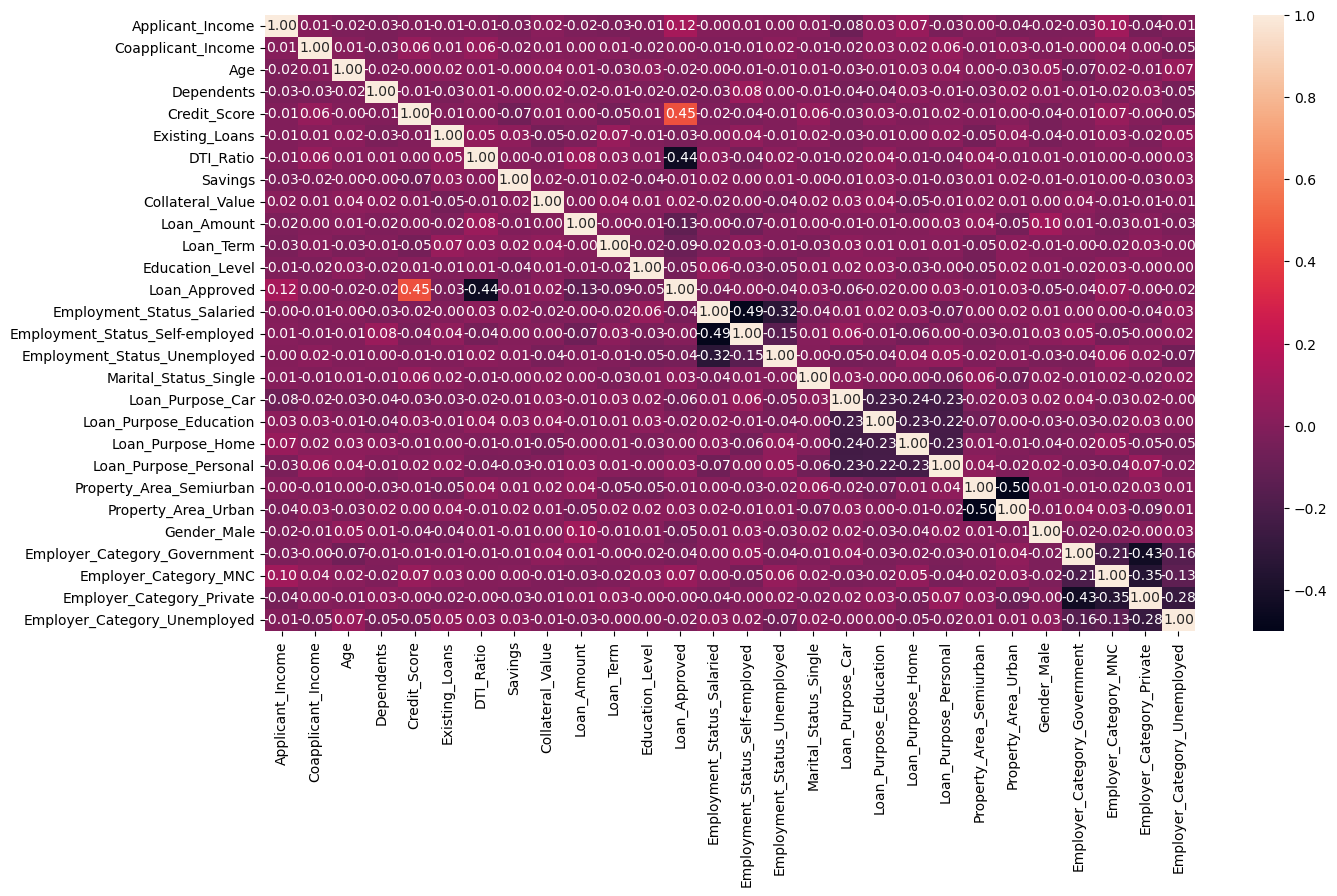

In [220]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f")

In [222]:
X =df.drop("Loan_Approved",axis =1)
y =df['Loan_Approved']

In [224]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [226]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

In [236]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict on TEST data
y_pred = log_model.predict(X_test_scaled)

print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Precision : 0.8518518518518519
Recall : 0.7540983606557377
F1 Score : 0.8
Confusion Matrix :
 [[131   8]
 [ 15  46]]
Accuracy : 0.885


In [238]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train
knn_model.fit(X_train_scaled, y_train)

# Predict on TEST data (important!)
y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Precision : 0.6086956521739131
Recall : 0.45901639344262296
F1 Score : 0.5233644859813084
Confusion Matrix :
 [[121  18]
 [ 33  28]]
Accuracy : 0.745


In [240]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create model
nb_model = GaussianNB()

# Train
nb_model.fit(X_train_scaled, y_train)

# Predict on TEST data
y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Precision : 0.7777777777777778
Recall : 0.6885245901639344
F1 Score : 0.7304347826086957
Confusion Matrix :
 [[127  12]
 [ 19  42]]
Accuracy : 0.845


In [242]:
df['DTI_Ratio_sq'] =df['DTI_Ratio']**2
df['Credit_Score_sq'] =df['Credit_Score']**2 

df['Applicant_Income_Log'] =np.log1p(df['Applicant_Income'])

X =df.drop(columns =['Loan_Approved',"Credit_Score","DTI_Ratio"])
y =df['Loan_Approved']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
scaler =StandardScaler() 
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test) 

In [244]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_Income_Log
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000,8.681181
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000,8.472196
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000,9.292249
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000,7.776954
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187,8.561975


In [246]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict on TEST data
y_pred = log_model.predict(X_test_scaled)

print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Precision : 0.8301886792452831
Recall : 0.7213114754098361
F1 Score : 0.7719298245614035
Confusion Matrix :
 [[130   9]
 [ 17  44]]
Accuracy : 0.87


In [248]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create model
nb_model = GaussianNB()

# Train
nb_model.fit(X_train_scaled, y_train)

# Predict on TEST data
y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


Precision : 0.8113207547169812
Recall : 0.7049180327868853
F1 Score : 0.7543859649122807
Confusion Matrix :
 [[129  10]
 [ 18  43]]
Accuracy : 0.86
